In [23]:
np.set_printoptions(suppress=True)

## Generate absolute linear y values

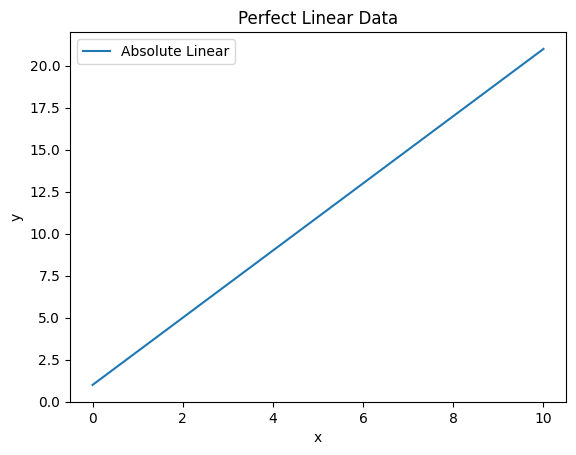

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 2.0    # Slope
b = 1.0    # Intercept
x_start = 0
x_end = 10
num_points = 100

# Generate x values
x = np.linspace(x_start, x_end, num_points)

# Compute y values
y = m * x + b

# Plot
plt.plot(x, y, label='Absolute Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perfect Linear Data')
plt.legend()
plt.show()

## Generate linear y values with noise

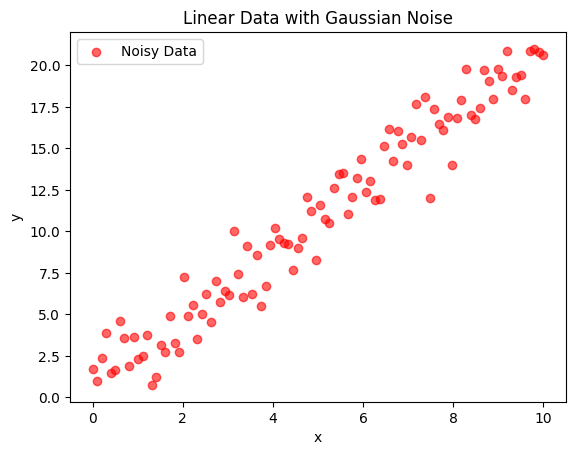

In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Noise parameters
noise_std = 1.5  # Standard deviation of noise

# Generate noise
noise = np.random.normal(0, noise_std, size=num_points)

# Add noise to y-values
y_noisy = y + noise

# Plot
plt.scatter(x, y_noisy, label='Noisy Data', color='red', alpha=0.6)
# plt.plot(x, y, label='True Line', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Data with Gaussian Noise')
plt.legend()
plt.show()

In [28]:
## y = ax + b

def MSE(x, y, a = 0, b = 0):
    line = np.array(a*x + b)
    # for i in range(len(line)):
    #     print(y[i] - line[i])
    
    # print(np.sum(np.array(np.power(line - y, 2))))
    # print(np.array(np.power(line - y, 2)))
    return np.sum(np.array(np.power(line - y, 2)))
    
MSE(x, y_noisy, 1, 5)

1140.3381090756977

In [191]:
def Gradient_descent(x, y, iterations = 1000, alpha = 1):
    a, b = (y[-1] - y[0]) / (x[-1] - x[0]), np.min(y)
    print(a, b)
    loss = [MSE(x, y, a, b)]
    zeros = 100
    
    for i in range(int(iterations)):
        start_error = np.min(loss)
        
        new_error = MSE(x, y, a + alpha, b)
        if (new_error < np.min(loss)):
            loss.append(new_error)
            a += alpha
            print(f"a = {a}")
        
        new_error = MSE(x, y, a - alpha, b)
        if (new_error < np.min(loss)):
            loss.append(new_error)
            a -= alpha
            print(f"a = {a}")
            
        new_error = MSE(x, y, a, b + alpha)
        if (new_error < np.min(loss)):
            loss.append(new_error)
            b += alpha
            print(f"b = {b}")
            
        new_error = MSE(x, y, a, b - alpha)
        if (new_error < np.min(loss)):
            loss.append(new_error)
            b -= alpha
            print(f"b = {b}")
        
        if (np.min(loss) == start_error):
            if zeros == 0:
                break
            alpha /= 10
            zeros -= 1
            
    print(loss)
    print(loss[-1])
    plt.plot(range(len(loss)), loss, label='True Line', color='blue', linewidth=2)
    plt.scatter(range(len(loss)), loss, color='red', alpha=0.6)
    return a, b

1.890304807042043 0.7563422592759297
b = 1.7563422592759297
b = 1.6563422592759296
b = 1.5563422592759295
b = 1.4563422592759294
b = 1.3563422592759293
a = 1.900304807042043
b = 1.3463422592759293
a = 1.910304807042043
b = 1.3363422592759293
a = 1.920304807042043
b = 1.3263422592759293
a = 1.930304807042043
b = 1.3163422592759293
b = 1.3063422592759293
a = 1.940304807042043
b = 1.2963422592759293
b = 1.2863422592759293
b = 1.2763422592759293
b = 1.2663422592759292
b = 1.2563422592759292
b = 1.2463422592759292
b = 1.2363422592759292
a = 1.950304807042043
b = 1.2263422592759292
b = 1.2163422592759292
b = 1.2063422592759292
b = 1.1963422592759292
b = 1.1863422592759292
b = 1.1763422592759292
a = 1.960304807042043
b = 1.1663422592759292
b = 1.1563422592759292
b = 1.1463422592759291
b = 1.1363422592759291
b = 1.1263422592759291
b = 1.1163422592759291
b = 1.106342259275929
a = 1.970304807042043
b = 1.096342259275929
b = 1.086342259275929
b = 1.076342259275929
b = 1.066342259275929
b = 1.0563

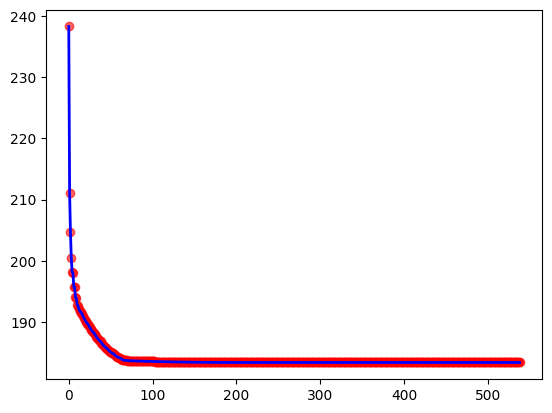

In [194]:
a, b = Gradient_descent(x, y_noisy)

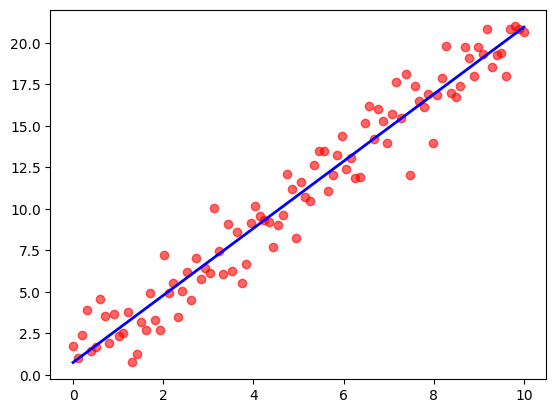

In [195]:
x = np.linspace(x_start, x_end, num_points)
y_pred = a*x + b

plt.plot(x, y_pred, label='True Line', color='blue', linewidth=2)
plt.scatter(x, y_noisy, color='red', alpha=0.6)